# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [81]:
#Import pandas, read the input files and select 10 random rows
import pandas as pd
df = pd.read_csv('iris.csv')
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
144,145,6.7,3.3,5.7,2.5,Iris-virginica
31,32,5.4,3.4,1.5,0.4,Iris-setosa
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
7,8,5.0,3.4,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
135,136,7.7,3.0,6.1,2.3,Iris-virginica
18,19,5.7,3.8,1.7,0.3,Iris-setosa
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa
28,29,5.2,3.4,1.4,0.2,Iris-setosa


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [82]:
#Calculate the number of missing values 
df.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

Fill missing values with median of that particular column

In [83]:
#Replace the missing values with the median
df.fillna(df.median(),inplace=True)

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [84]:
#Change species to numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [85]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
96,97,5.7,2.9,4.2,1.3,1
108,109,6.7,2.5,5.8,1.8,2
44,45,5.1,3.8,1.9,0.4,0
15,16,5.7,4.4,1.5,0.4,0
134,135,6.1,2.6,5.6,1.4,2
118,119,7.7,2.6,6.9,2.3,2
3,4,4.6,3.1,1.5,0.2,0
63,64,6.1,2.9,4.7,1.4,1
94,95,5.6,2.7,4.2,1.3,1
50,51,7.0,3.2,4.7,1.4,1


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

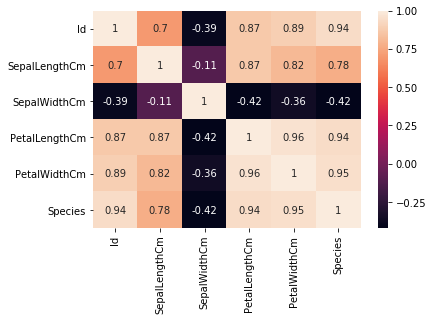

In [87]:
sns.heatmap(df.corr(),annot=True)

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [88]:
#Variance of dataframe
df.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

In [89]:
df.loc[:,df.var()>0.1].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000074209CEE10>,
      dtype=object)

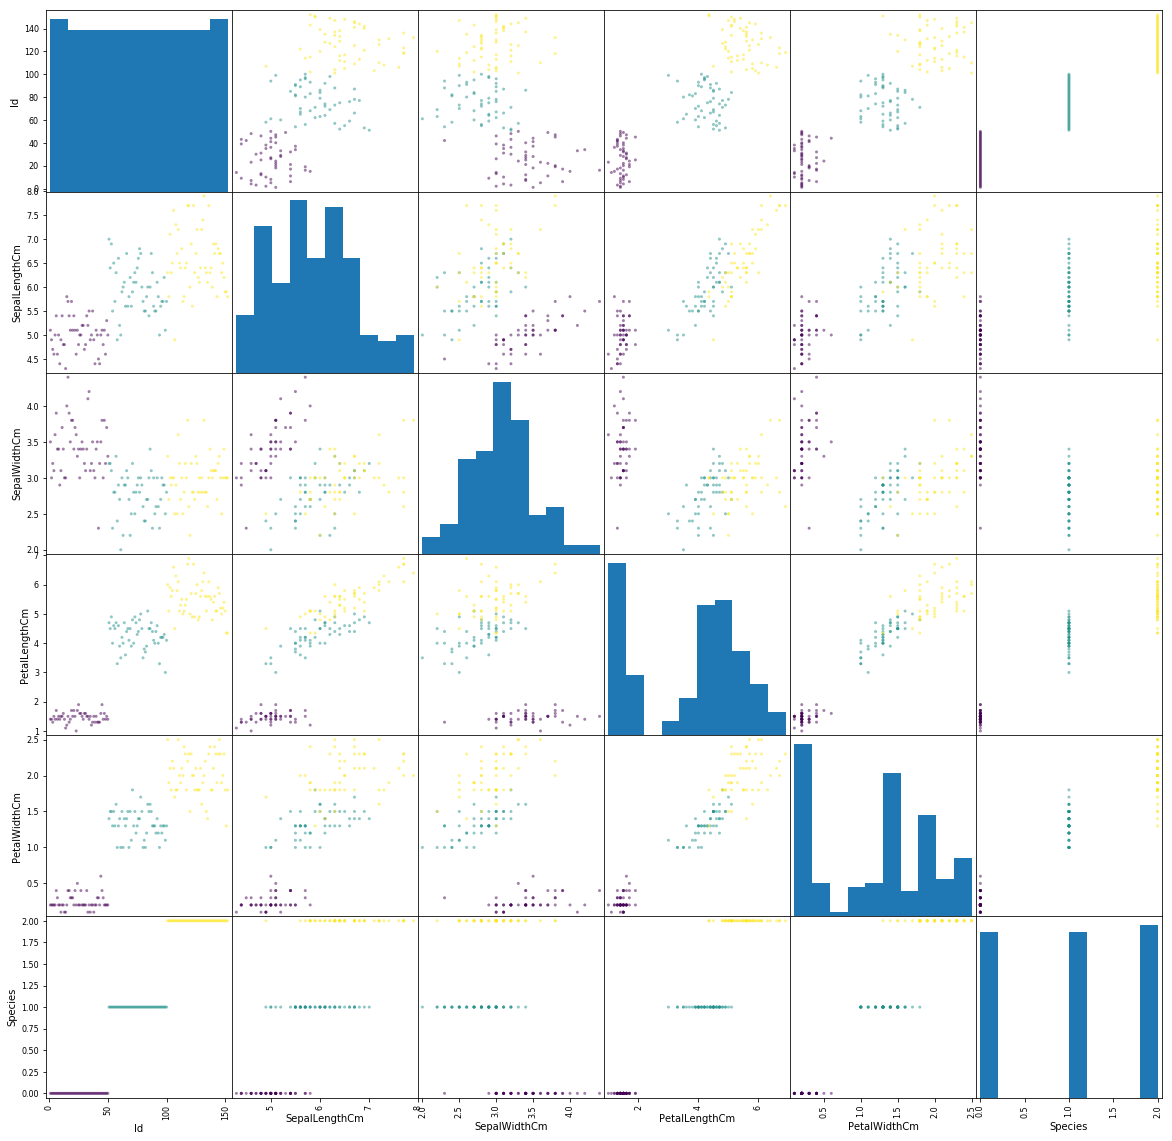

In [90]:
#Pairplot
pd.plotting.scatter_matrix(df,c=df['Species'],figsize=(20,20))

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [91]:
#Split dataset in traing and test sets in 80:20 ratio
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop(['Species','Id'], axis=1)
y=df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(121, 4) (121,)
(31, 4) (31,)


## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9354838709677419


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in [3,5,9]:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred))

0.9354838709677419
0.967741935483871
0.9032258064516129


## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

In [94]:
# empty list that will hold accuracy scores
ac_scores = []

for k in range(1, 20, 2) :
  model = KNeighborsClassifier(n_neighbors = k)    # initialize the model
  model.fit(X_train, y_train)                      # fit the model
  y_pred = model.predict(X_test)                   # make predictions
  score = accuracy_score(y_test, y_pred)           # get accuracy
  ac_scores.append((score, k))                     # append accuracy score
  
# determining best k
print("The max accuracy and optimal number of neighbors is {}".format(max(ac_scores)))


The max accuracy and optimal number of neighbors is (0.967741935483871, 5)


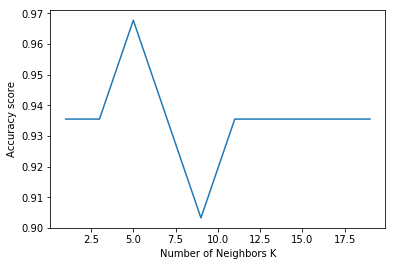

In [95]:
import matplotlib.pyplot as plt

score, k = zip(*ac_scores)
plt.plot(k, score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy score')
plt.show()

# Breast cancer dataset - OPTIONAL

## Read data

### Question 1
Read the data given in bc2.csv file

In [96]:
#Import pandas, read bc2.csv and display random
import pandas as pd
df_bc = pd.read_csv('bc2.csv')
df_bc.sample(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
64,1116192,1,1,1,1,2,1,2,1,1,2
136,1182404,4,1,1,1,2,1,2,1,1,2
123,1174428,5,3,5,1,8,10,5,3,1,4
402,1223003,5,3,3,1,2,1,2,1,1,2
563,1328755,3,1,1,1,2,1,2,1,1,2
600,1336798,3,1,1,1,2,1,2,1,1,2
153,1190394,4,1,1,1,2,3,1,1,1,2
114,1173235,3,3,2,1,2,3,3,1,1,2
383,1022257,2,1,1,1,2,1,1,1,1,2
530,837480,7,4,4,3,4,10,6,9,1,4


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [97]:
#Display the no of records and type of column for the Breast Cancet Dataset
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [98]:
#Type of each column
df_bc.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [99]:
#Show the summpary of the Dataframe
df_bc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


#### Check Missing Values

In [100]:
#Check for missing values. It looks like there are no missing values.
df_bc.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [101]:
#Check how many Bare Nuclei feature has unknown or missing values
df_bc['Bare Nuclei'][df_bc['Bare Nuclei'] == '?'].count()

16

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [102]:
#Replace the Bare Nuclei feature containing ? with the top value which is 1
df_bc['Bare Nuclei'].replace("?", df_bc.describe(include='all')['Bare Nuclei']['top'], inplace=True)

### Question 5
#### Find the distribution of target variable (Class) 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


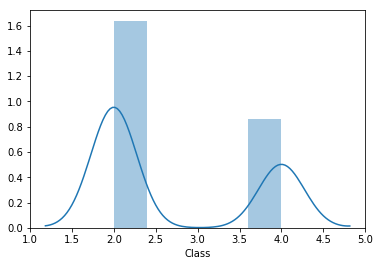

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df_bc["Class"])

#### Plot the distribution of target variable using histogram

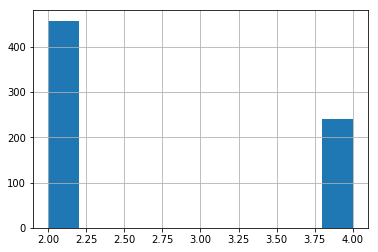

In [104]:
df_bc['Class'].hist()

#### Convert the datatype of Bare Nuclei to `int`

In [105]:
df_bc["Bare Nuclei"].astype('int').dtypes

dtype('int32')

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000742150BE80>,
      dtype=object)

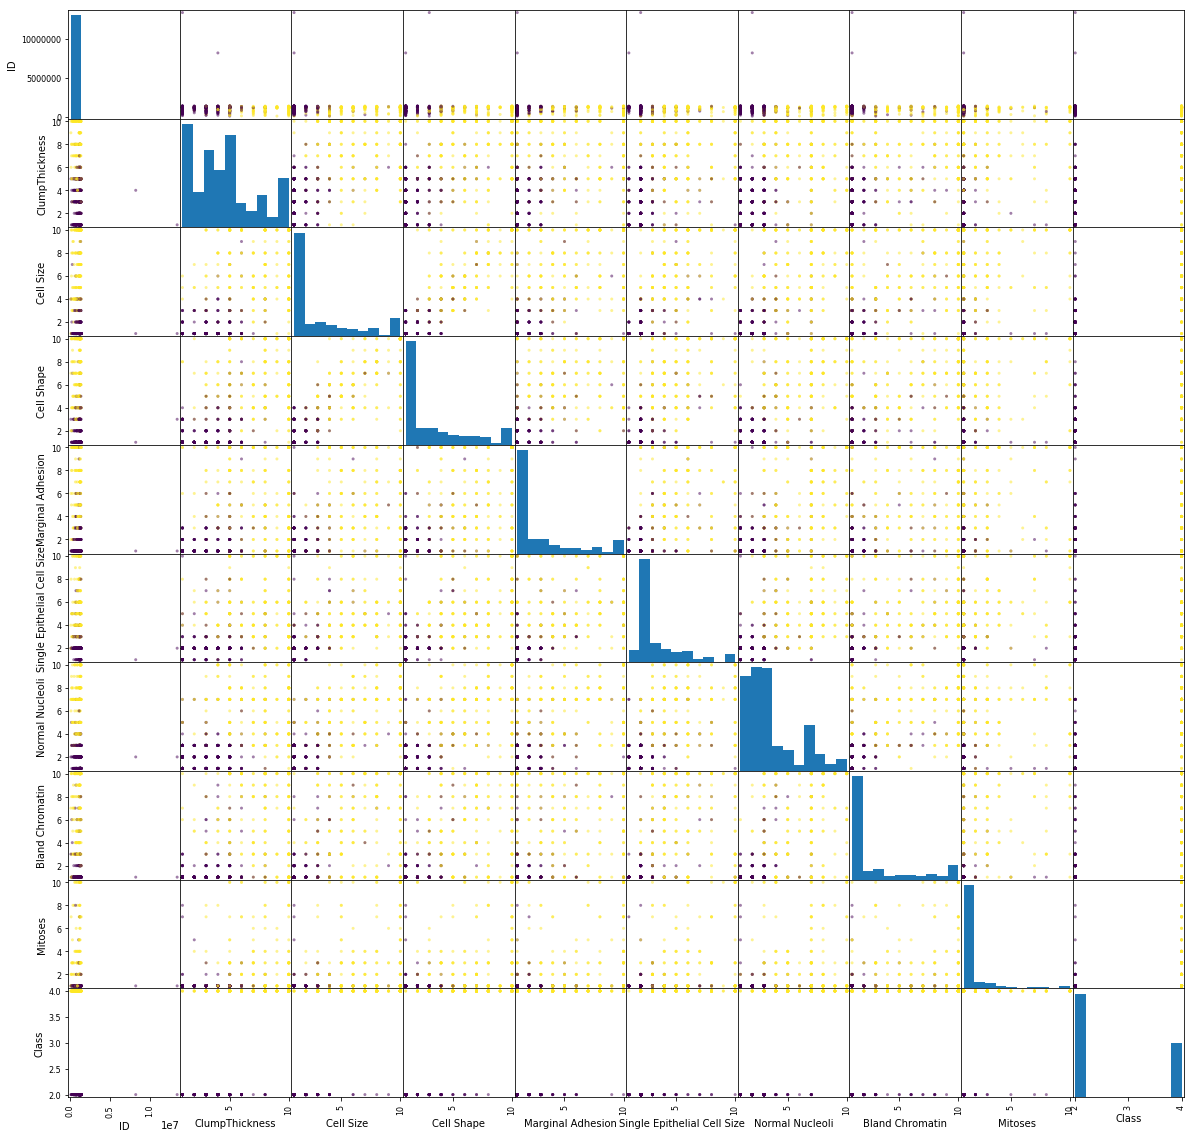

In [106]:
#pd.plotting.scatter_matrix(df,c=df['Species'],figsize=(20,20))
pd.plotting.scatter_matrix(df_bc,c=df_bc['Class'], figsize=(20,20))


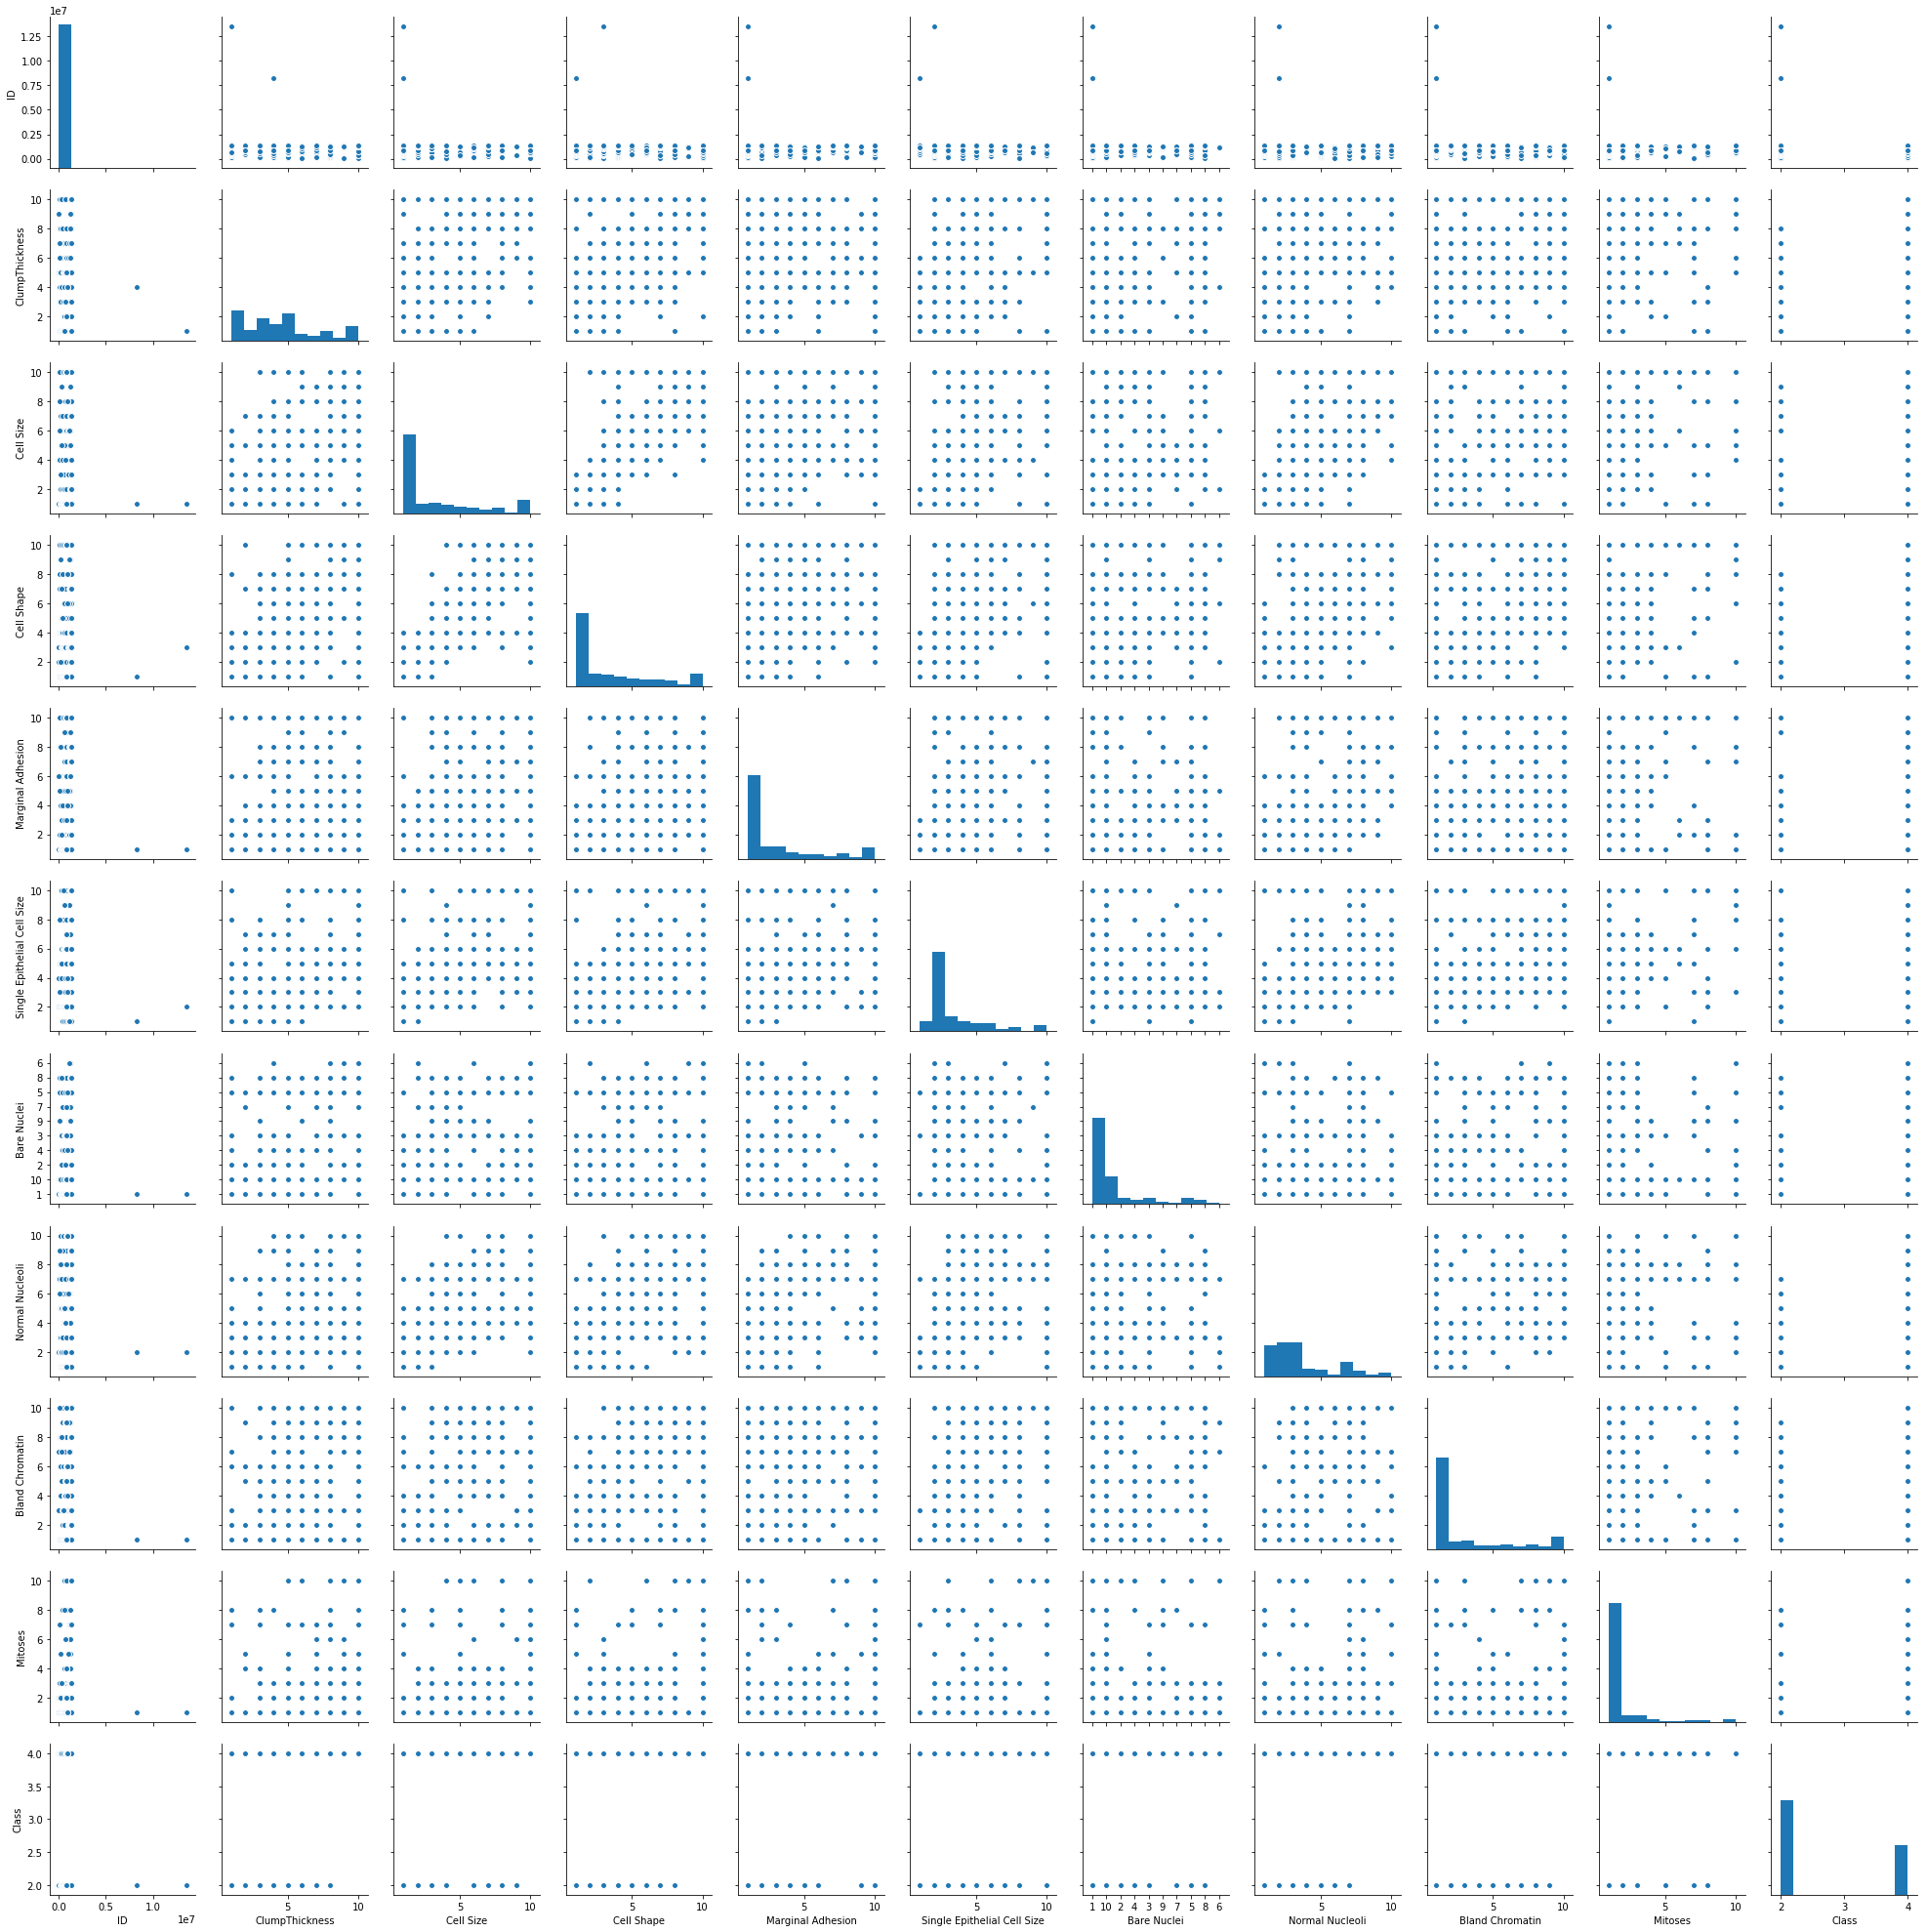

In [107]:
#Pairplot. Looks like ID column can be dropped
import seaborn as sns
sns.pairplot(df_bc)

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [108]:
X = df_bc.drop(['ID','Class'],axis=1)
y = df_bc['Class']

print(X)

     ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0                 5          1           1                  1   
1                 5          4           4                  5   
2                 3          1           1                  1   
3                 6          8           8                  1   
4                 4          1           1                  3   
5                 8         10          10                  8   
6                 1          1           1                  1   
7                 2          1           2                  1   
8                 2          1           1                  1   
9                 4          2           1                  1   
10                1          1           1                  1   
11                2          1           1                  1   
12                5          3           3                  3   
13                1          1           1                  1   
14                8      

#### Divide the Training and Test sets in 70:30 

In [109]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
#print(X_train)
#print(X_test)

(489, 9) (489,)
(210, 9) (210,)


## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_new = scaler.fit(X_train)
#y_train_new = scaler.fit(y_train)


## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in [3,5,9]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred))

0.9761904761904762
0.9761904761904762
0.9761904761904762


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ac_scores_bc = []

for k in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    ac_scores_bc.append((accuracy_score(y_test, y_pred), k))

0.9571428571428572
0.9761904761904762
0.9761904761904762
0.9809523809523809
0.9761904761904762
0.9761904761904762
0.9761904761904762
0.9714285714285714
0.9714285714285714
0.9714285714285714


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

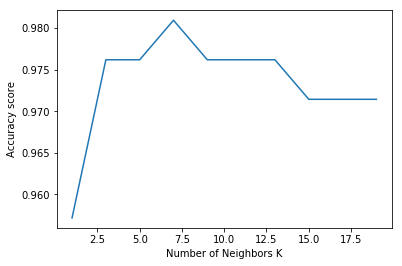

In [115]:
#Accuracy is high when k=7
import matplotlib.pyplot as plt

score, k = zip(*ac_scores_bc)
plt.plot(k, score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy score')
plt.show()